<a href="https://colab.research.google.com/github/samangelap/Prediction-of-Sales/blob/main/Prediction_of_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales


###Samantha Perez

##Project Overview

## Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_sales = pd.read_csv('/content/drive/MyDrive/02 Week 2: Panda/sales_predictions_2023.csv')
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

In [4]:
df_sales.shape


(8523, 12)

- There are 8523 rows and 12 columns.

In [5]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###Duplicated Data

In [6]:
df_sales.duplicated().sum()

0

- There are 0 duplicate values in the dataset.

### Identify Missing Values

In [7]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

% of Missing Data

In [8]:
df_sales.isna().sum() / len(df_sales) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values:
  - There are 1463 missing values in the Item_Weight column. (17.17%)
  - There ar 2410 missing values in the Outlet_Size column. (28.28%)

<Axes: >

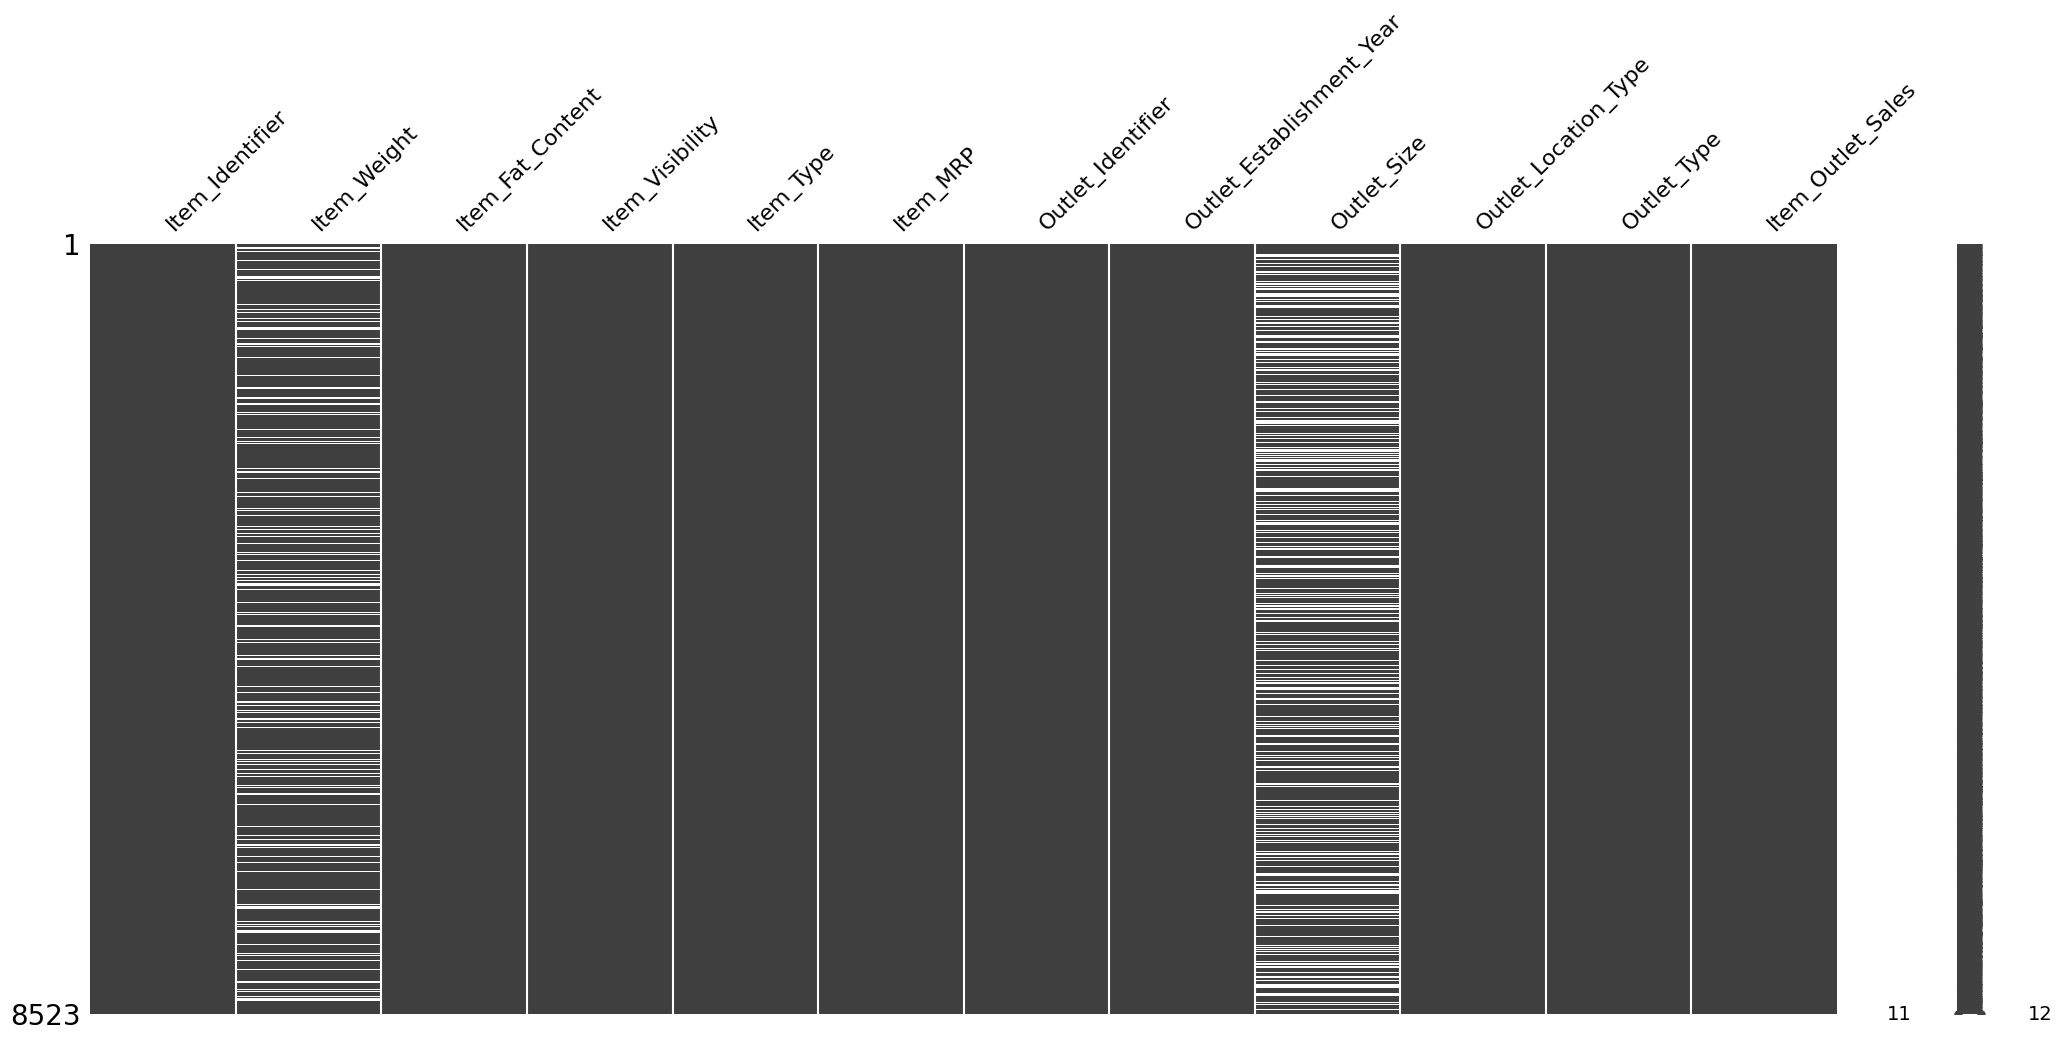

In [9]:
import missingno as msno
msno.matrix(df_sales)

### Finding Null Values

- Finding Null Values for column "Item_Weight"

In [10]:
null_Item_Weight = df_sales['Item_Weight'].isna()

In [11]:
df_sales[null_Item_Weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


- Finding Null Values for column "Outlet_Size"

In [12]:
null_Outlet_size = df_sales['Outlet_Size'].isna()

In [13]:
df_sales[null_Outlet_size]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


###How to handle missing values:
  - For Item_Weight, we do not want to input string value for numerical column. The best way to preserve the data, we could fill in missing values with median/mean.
  - For Outlet_Size, we can replace missing values with "Unknown" rather than dropping whole column

In [14]:
print(df_sales['Item_Weight'].mean())
print(df_sales['Item_Weight'].median())

12.857645184135976
12.6


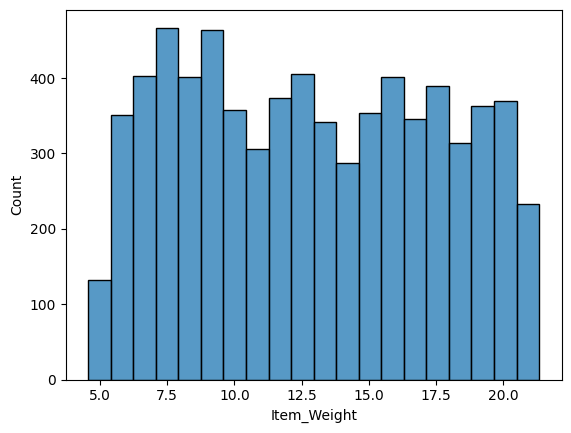

In [15]:
ax = sns.histplot(data = df_sales, x = 'Item_Weight')

The values appear to be evenly distributed.
- Replacing missing values with median rather than the mean seems to be the better option here. Median is less affected by skew and outliers.

In [16]:
median_value = df_sales['Item_Weight'].median()
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(median_value)

- Checking to make sure the values for the `Item_Weight` column were filled in.

In [17]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###Fill in missing values for Outlet_Size

In [18]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna(value = 'Unknown')

In [19]:
df_sales['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

- Check for remaining missing values using panda and missingno

###Pandas Method

In [20]:
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###Missingno Method

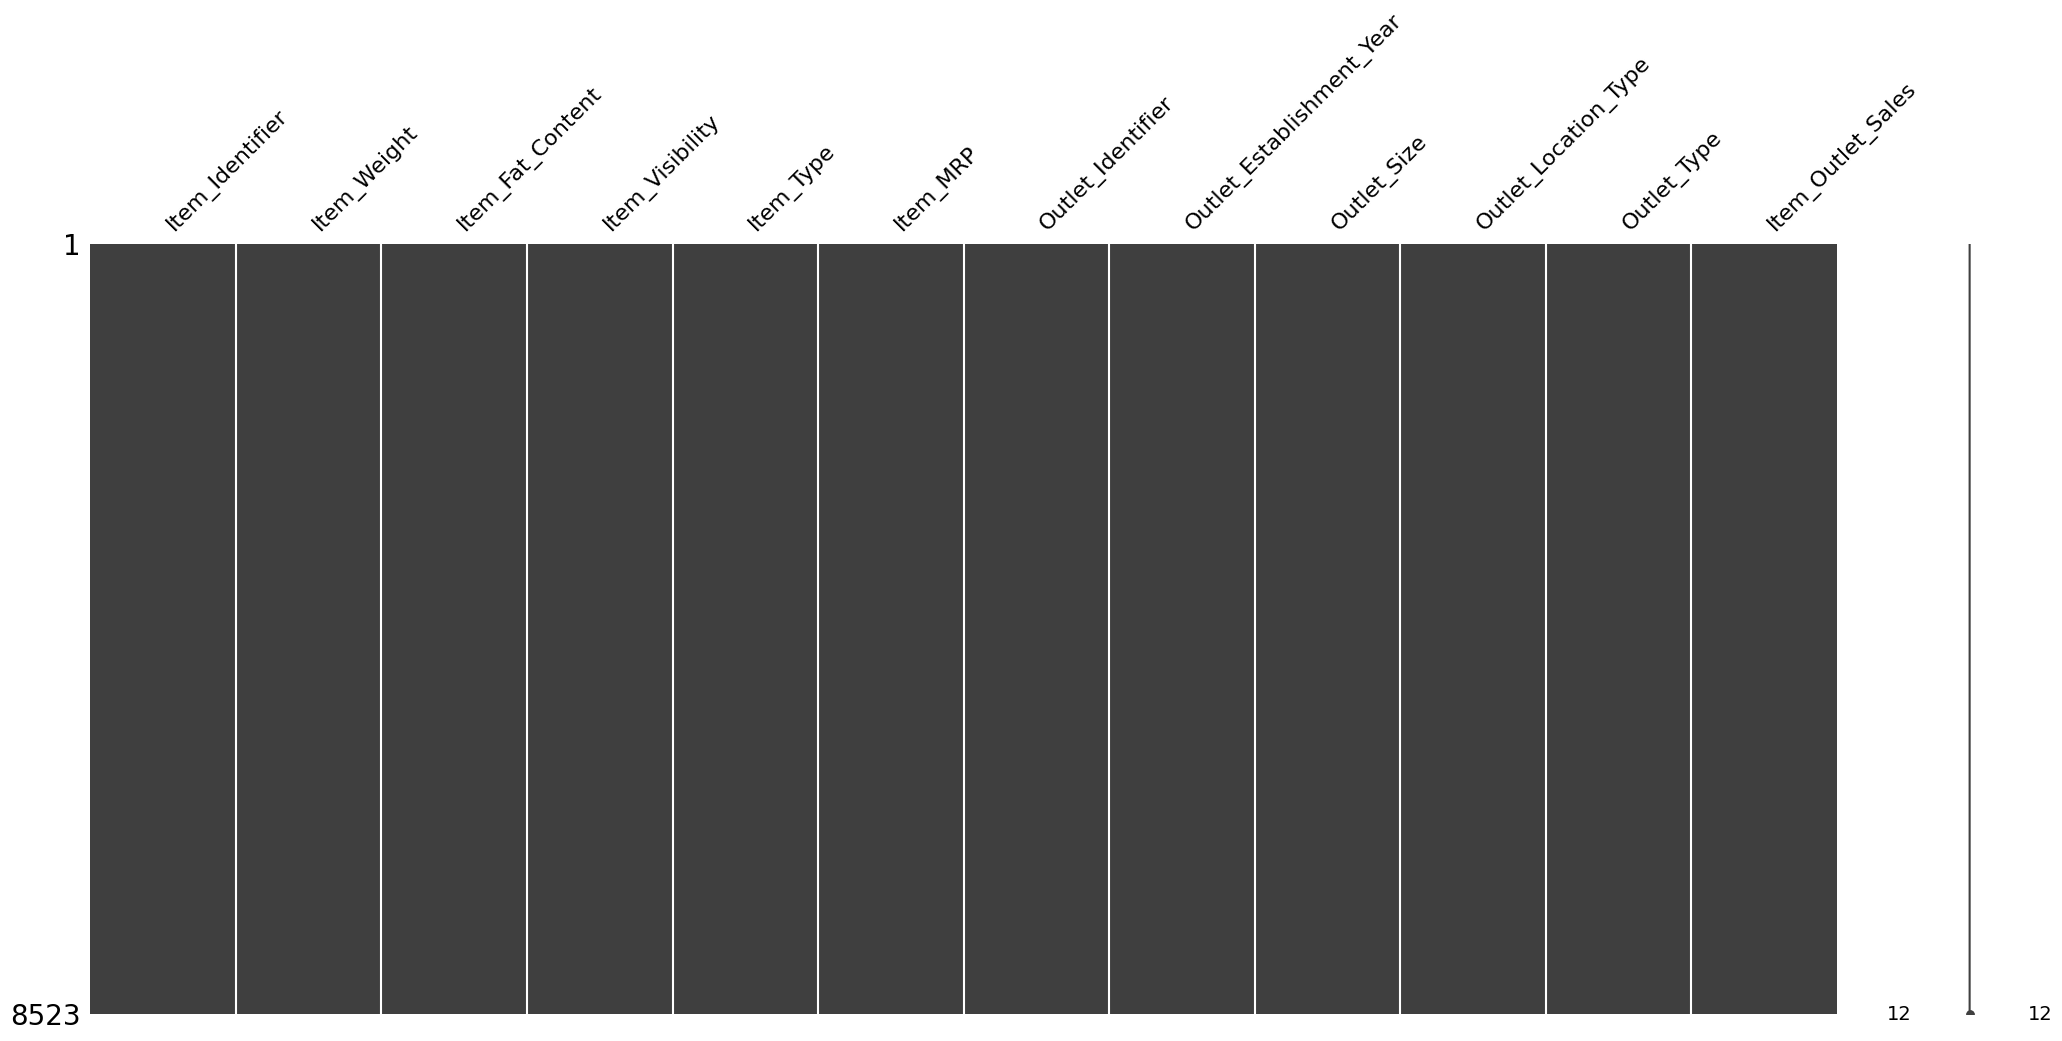

In [21]:
msno.matrix(df_sales);

- The missingno chart is displaying no missing values since there are no white lines under any column

##Check for Inconsistent Values

In [22]:
string_cols = df_sales.select_dtypes("object").columns

In [23]:
for column in string_cols:
  print(column)
  print(df_sales[column].unique())

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' 'Unknown' 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [24]:
string_cols = df_sales.select_dtypes("object").columns

In [25]:
for column in string_cols:
  print(f'Value counts for {column}')
  print(df_sales[column].value_counts())
  print('\n')

Value counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


- Item_Fat_Content shows to have inconsistent values
  - LF, and low fat will be updated to Low Fat
  - reg will be updated to Regular

In [26]:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':'Low Fat', 'reg':'Regular'})
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##Summary Statistics for Numeric Features

In [27]:
df_sales.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


- Look up central tendancies

In [28]:
stats =  df_sales.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

In [29]:
df_sales.describe(include=('number'))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


###Histogram for Item_Weight Column

In [30]:
df_sales['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

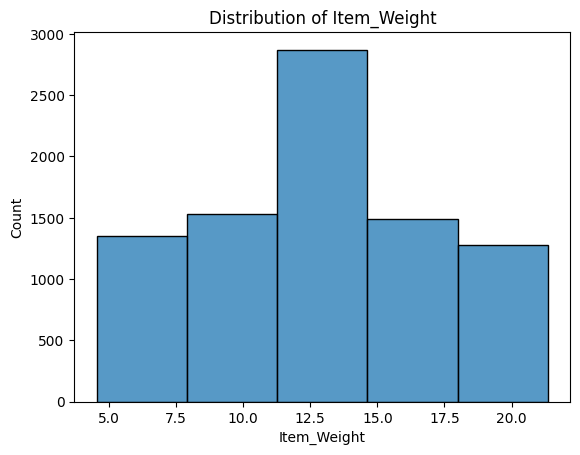

In [31]:
ax = sns.histplot(data = df_sales, x = 'Item_Weight', bins=5)
ax.set_title('Distribution of Item_Weight');

- Item_Weight column has a normal distribution 
- Median value is 12.6



###Boxplot for Item_Weight

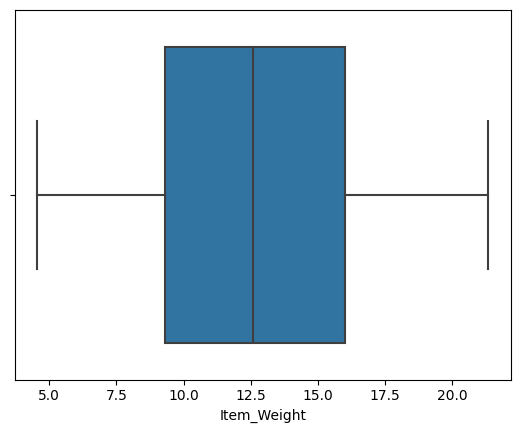

In [32]:
ax = sns.boxplot(data = df_sales, x = 'Item_Weight')

- The boxplot shows there are no outliers (min and max) within this column

###Histogram for Item_Visibility

In [33]:
df_sales['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

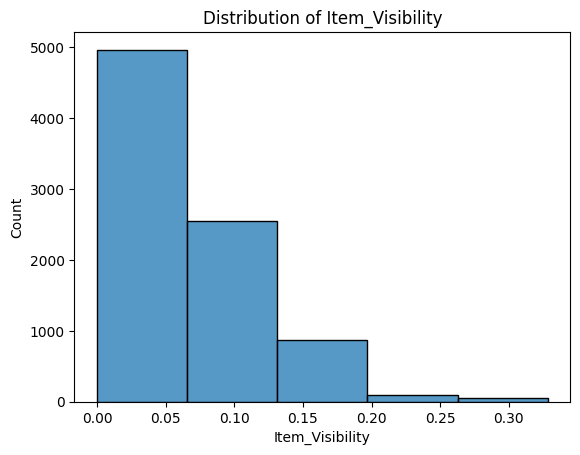

In [34]:
ax = sns.histplot(data = df_sales, x = 'Item_Visibility', bins=5)
ax.set_title('Distribution of Item_Visibility');

- Item_Visibility column distribution is positively skewed

###Boxplot for Item_Visibility

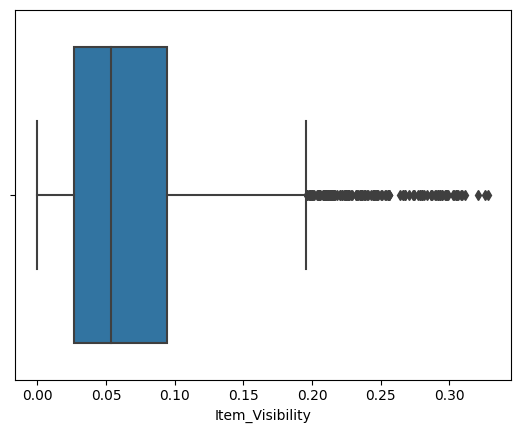

In [35]:
ax = sns.boxplot(data = df_sales, x = 'Item_Visibility')

- The boxplot is positively skewed
- Multiple outliers are populated in the high side

###Histogram for Item_MRP

In [36]:
df_sales['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

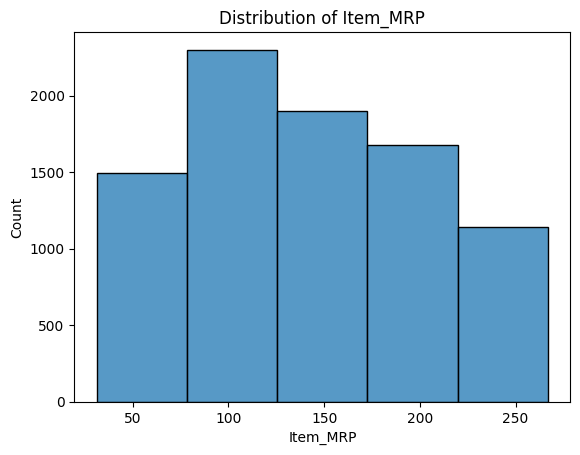

In [37]:
ax = sns.histplot(data = df_sales, x = 'Item_MRP', bins=5)
ax.set_title('Distribution of Item_MRP');

- Item_Visibility column is positively skewed

###Boxplot for Item_MRP

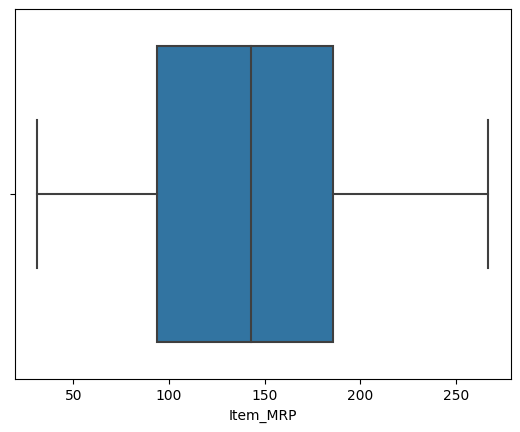

In [38]:
ax = sns.boxplot(data = df_sales, x = 'Item_MRP')

- The boxplot shows there are no min or max outliers

###Histogram for Item_Outlet_Sales

In [39]:
df_sales['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

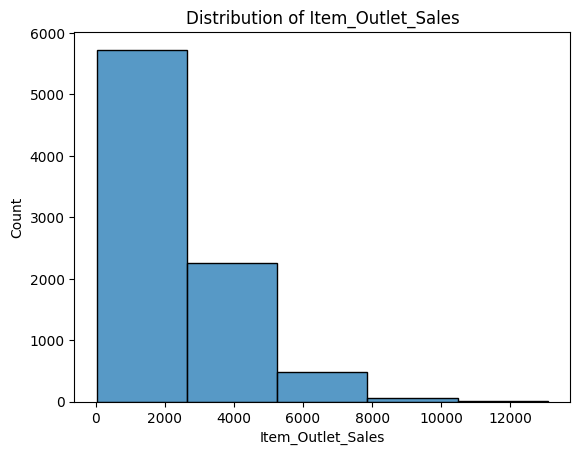

In [40]:
ax = sns.histplot(data = df_sales, x = 'Item_Outlet_Sales', bins=5)
ax.set_title('Distribution of Item_Outlet_Sales');

- Item_Outlet_Sales is positively skewed

###Boxplot for Item_Outlet_Sales

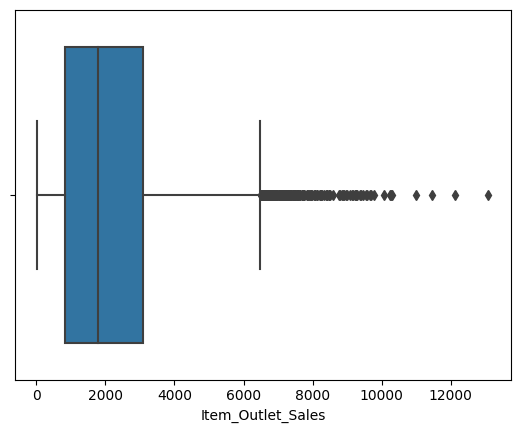

In [41]:
ax = sns.boxplot(data = df_sales, x = 'Item_Outlet_Sales')

- The boxplot is positively skewed
- There are multiple maximum outlier values 

##Heatmap of Correlation

In [42]:
corr = df_sales.corr()

In [43]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


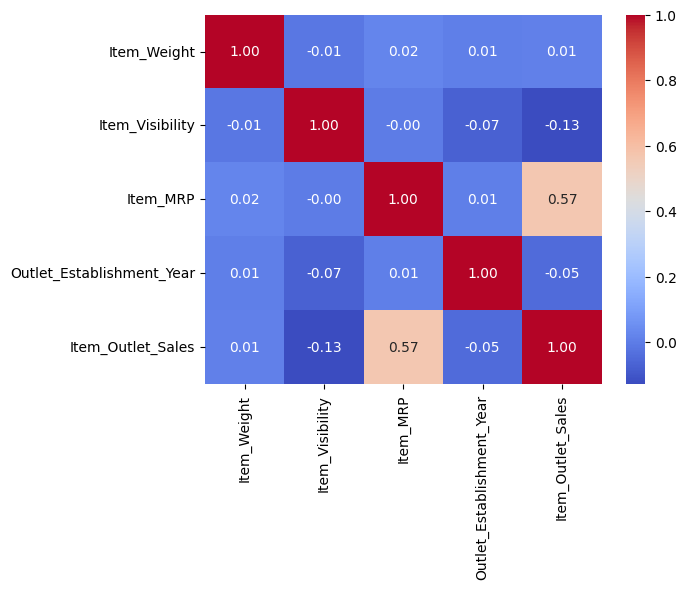

In [44]:
ax = sns.heatmap(corr, cmap= 'coolwarm', annot = True, fmt = '.2f')

The heatmap shows a positive correlation of 0.57 between Item_MRP and Item_Outlet_Sales
- The correlation can be described as moderately correlated. The higher the MRP values, the higher the sale.

##Barplot for Item_Type and Item_Outlet_Sales

In [47]:
df_sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

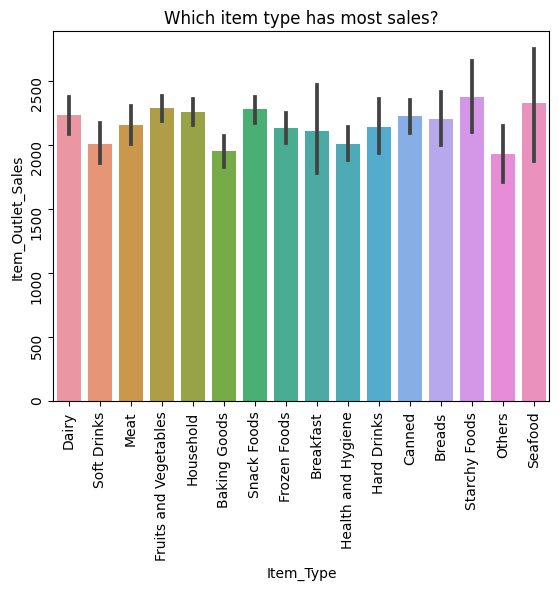

In [48]:
ax = sns.barplot(data = df_sales, x = 'Item_Type', y = 'Item_Outlet_Sales')
ax.tick_params(rotation = 90)
ax.set_title('Which item type has most sales?');

The barplot shows baking good and others have lowest outlet sales, while starchy foods, dairy and seafood have the highest.

## Explanatory Data Analysis

Questions to answer: 

1. What is the distribution of item_outlet_sales?
2. Which outlet year made the most and least money after its establishment?
3. How does item MRP affect sales?

**1. What is the distribution of item_outlet_sales?**

In [49]:
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in thousands"""
    return f"${x*1e-3:,.0f}K"


def plot_dist(data,x,y,figsize=(10,5),format_price=True,
              despine=True):
  
    fig, ax = plt.subplots(figsize=figsize)

    sns.histplot(data=df_sales,x=x,ax=ax)
    ax.set_title(f'Distribution of Item Sales in {y}',
                 fontsize='x-large',y=1.1);

    mean_price = data[x].mean()
    ax.axvline(mean_price,color='palevioletred', ls='--', lw=3,
            label=f"Mean {x} = ${mean_price:,.2f}");

    med_price = data[x].median()
    ax.axvline(med_price,color='plum', ls=':', lw=3,
            label=f"Median {x} = ${med_price:,.2f}");

    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')

    if format_price:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    if despine:
        ## removing top and right border
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
      
    ax.legend()

    return fig,ax

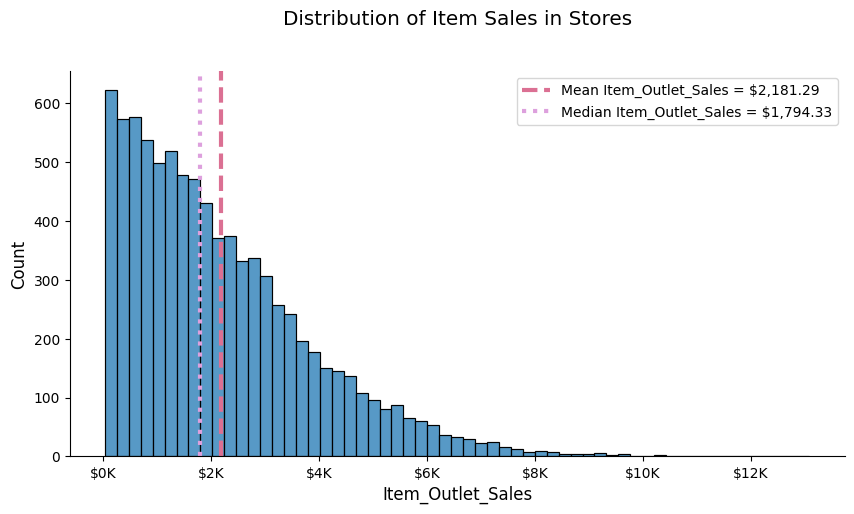

In [50]:
best_fig,ax = plot_dist(df_sales, 'Item_Outlet_Sales', 'Stores',)

**2. Which outlet year made the most and least money after its establishment?**

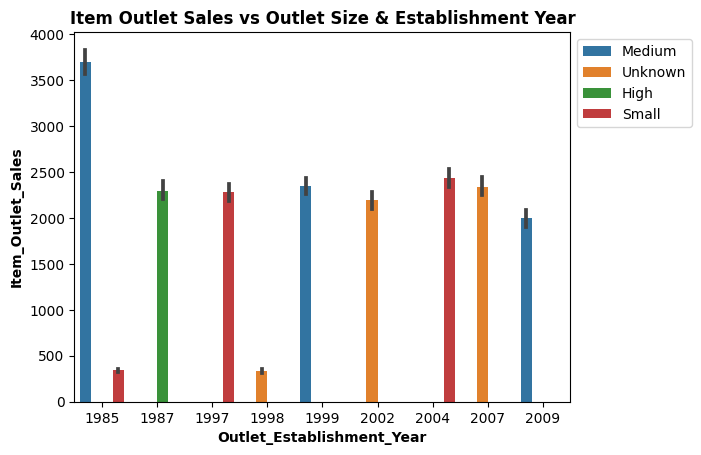

In [51]:
fig, ax = plt.subplots()

ax = sns.barplot(data=df_sales,
                 x='Outlet_Establishment_Year',
                 y = 'Item_Outlet_Sales', hue='Outlet_Size')

ax.set_title('Item Outlet Sales vs Outlet Size & Establishment Year', fontsize=12, fontweight = 'bold')

ax.set_xlabel('Outlet_Establishment_Year', fontsize=10, fontweight='bold')

ax.set_ylabel('Item_Outlet_Sales', fontsize=10, fontweight='bold')

ax.legend(bbox_to_anchor=[1,1]);

Based on the barplot, the outlet sales were highest in 1985 for medium size outlet and lowest in both 1985 and 1998 for small outlet. There is no correlation between outlet sales and size of outlet.

**3. How does item MRP affect sales?**

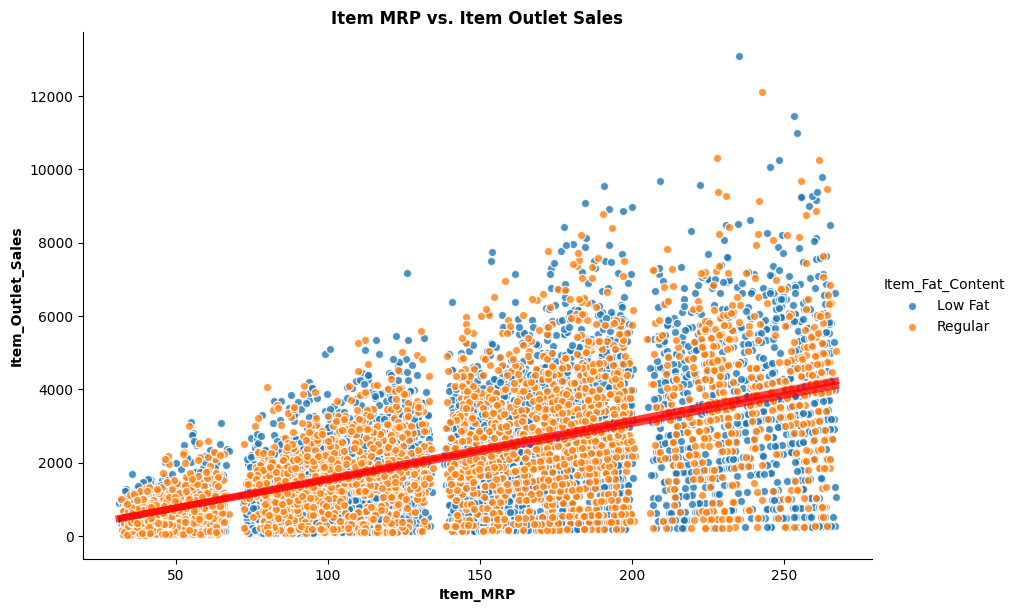

In [57]:
scatter_kws = dict(edgecolor='white')
g = sns.lmplot(data=df_sales,
                 x='Item_MRP',
                 y = 'Item_Outlet_Sales', scatter_kws=scatter_kws, hue='Item_Fat_Content', line_kws={"color":"r","alpha":0.7,"lw":5}, 
               height=6, aspect=1.5)

## Set the Title
g.ax.set_title('Item MRP vs. Item Outlet Sales', fontsize=12, fontweight = 'bold')
## Set the X axis label
g.ax.set_xlabel('Item_MRP', fontsize=10, fontweight='bold')
## Set the Y axis label
g.ax.set_ylabel('Item_Outlet_Sales', fontsize=10, fontweight='bold');

Based on the scatterplot, there is a positive correlation between item MRP and item outlet sales. The products with highest MRP account for high value of sales. Additionally, the plot shows that items with low fat content have higher MRP. 